# S&P 500 Best and Worst Days Analysis

## 📊 Executive Summary

This notebook analyzes the **recovery patterns** of the S&P 500 following its worst trading days since 1957. By examining the top 100 worst single-day returns, we investigate whether "buying the dip" strategies have historically been profitable and over what time horizons.

## 🎯 Key Research Questions

1. **How often does the market recover after major selloffs?**
2. **What is the optimal time horizon for recovery strategies?**
3. **What are the risk-reward characteristics at different time windows?**

## 📈 Methodology

- **Data Source**: S&P 500 historical daily prices from Stooq (1957-2025)
- **Analysis Period**: Post-1957 (official S&P 500 Index inception)
- **Sample**: Top 100 worst single-day returns (-3.2% to -20.5%)
- **Time Windows**: 5, 10, 30, 60, and 90 trading days post-crash
- **Metric**: Cumulative returns from the worst day forward

## 🔍 Key Findings

### Recovery Probability by Time Horizon

| Time Window | Success Rate | Average Return | Median Return | Best Case | Worst Case |
|-------------|--------------|----------------|---------------|-----------|------------|
| **5 days**  | **19%** ⚠️    | -4.15%         | -3.69%        | +10.27%   | -19.52%    |
| **10 days** | **32%** ⚠️    | -4.01%         | -3.04%        | +11.27%   | -28.74%    |
| **30 days** | **39%** ⚠️    | -2.73%         | -2.29%        | +20.45%   | -32.30%    |
| **60 days** | **59%** ✅    | +1.24%         | +1.87%        | +26.97%   | -33.78%    |
| **90 days** | **61%** ✅    | +2.23%         | +4.30%        | +31.17%   | -34.14%    |

### 💡 Strategic Insights

#### ⚠️ **Short-Term Risks (5-30 days)**
- **High volatility** with success rates below 40%
- **Negative expected returns** on average
- **Not recommended** for immediate recovery strategies

#### ✅ **Medium-Long Term Opportunities (60-90 days)**
- **59-61% success rate** - favorable odds
- **Positive expected returns** (+1.24% to +2.23%)
- **2-3 month horizon** appears optimal for recovery

#### 🎲 **Risk Characteristics**
- **Tail risk remains significant**: Even at 90 days, worst-case scenario is -34%
- **Asymmetric upside**: Best recoveries (+26% to +31%) exceed worst declines
- **Time diversification works**: Longer horizons improve risk-adjusted returns

## 🛠️ Trading Strategy Implications

### ✅ **What Works**
- **Patient capital allocation**: Wait 60-90 days for recovery
- **Dollar-cost averaging**: Spread purchases over time rather than lump-sum
- **Position sizing**: Account for 40% failure rate even at optimal horizons

### ⚠️ **What Doesn't Work**
- **Immediate bottom fishing**: 5-10 day strategies have poor odds
- **All-in betting**: Significant tail risk remains even long-term
- **Leveraged positions**: High volatility makes leverage dangerous

## 📊 Historical Context

The analysis includes major market events:
- **Black Monday 1987** (-20.47%)
- **COVID-19 Crash 2020** (-11.98%, -9.51%)
- **2008 Financial Crisis** (-9.04%, -8.93%)
- **Flash Crash 2010** (-3.24%)

## ⚖️ Limitations & Disclaimers

- **Survivorship bias**: Analysis assumes continued market existence
- **Regime changes**: Future market structure may differ from historical patterns
- **Transaction costs**: Real-world implementation includes fees and slippage
- **Psychological factors**: Actual execution requires discipline during stress

**⚠️ This analysis is for educational purposes only and should not be considered financial advice.**

---

**Data Source:** [S&P 500 Historical Data - Stooq](https://stooq.com/q/d/?s=%5Espx)  
**Analysis Date:** October 2025  
**Sample Period:** January 1957 - October 2025

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# tickers = ['META']
tickers = ['NFLX']

# Download historical data from yf API
data = yf.download(tickers, period="max", group_by='ticker')

# download data to csv
data.to_csv(f"{tickers[0]}_data_1D.csv")

In [28]:
# Load the CSV with MultiIndex columns (Tickers, OHLCV)
df = pd.read_csv(f"{tickers[0]}_data_1D.csv", header=[0,1], index_col=0)

# Drop any rows that are completely NaN (e.g. 'Date' row)
df = df.dropna(how='all')

# Convert all values to float
df = df.astype(float)

# lower case for all the column names
df.columns = df.columns.set_levels([level.str.lower() for level in df.columns.levels])

# drop level 0 of the columns since we have only one ticker
df.columns = df.columns.droplevel(0)

# datetime index
df.index = pd.to_datetime(df.index)

# Show the result
df.head()

Price,open,high,low,close,volume
Date,,,,,
2012-05-18,41.792365,44.724291,37.767179,37.995770,573576400.0
2012-05-21,36.306182,36.435386,32.797811,33.821499,168192700.0
2012-05-22,32.410201,33.384196,30.750432,30.810064,101786600.0
2012-05-23,31.177799,32.300874,31.167860,31.803938,73600000.0
2012-05-24,32.748117,33.006523,31.575347,32.827625,50237200.0


In [29]:
df.shape

(3387, 5)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3387 entries, 2012-05-18 to 2025-11-05
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    3387 non-null   float64
 1   high    3387 non-null   float64
 2   low     3387 non-null   float64
 3   close   3387 non-null   float64
 4   volume  3387 non-null   float64
dtypes: float64(5)
memory usage: 158.8 KB


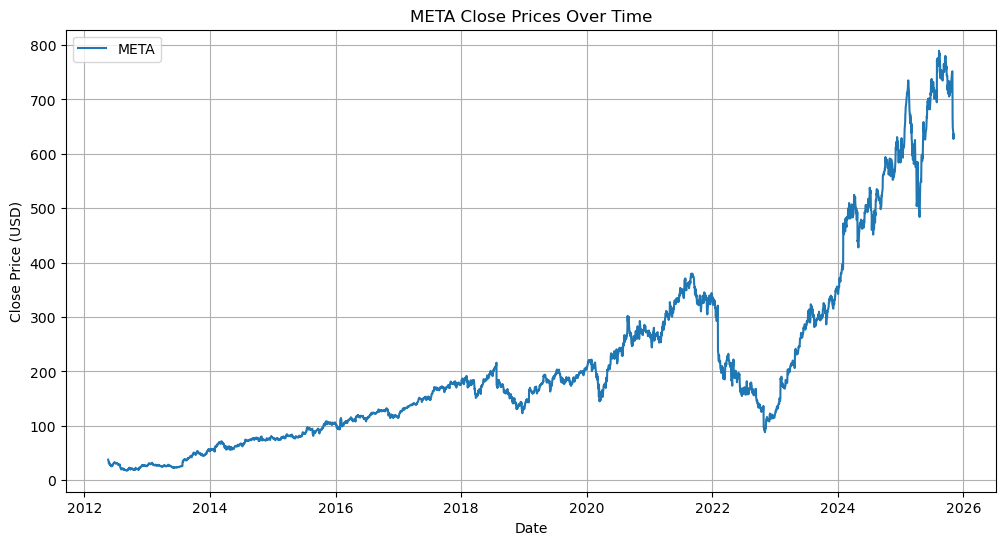

In [31]:
# plot close prices over time
plt.figure(figsize=(12,6))
plt.plot(df.index, df['close'], label=tickers[0])
plt.title(f"{tickers[0]} Close Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.grid()
plt.show()

In [32]:
# Calculate simple returns with pct_change()
simple_returns = df['close'].pct_change().fillna(0)

# Calculate log returns
log_returns = (1 + simple_returns).apply(np.log)

# Cumulative sum of simple returns (not correct for compounding)
cumsum_simple = simple_returns.cumsum()

In [33]:
simple_returns.tail()

Date
2025-10-30   -0.113348
2025-10-31   -0.027188
2025-11-03   -0.016411
2025-11-04   -0.016293
2025-11-05    0.013757
Name: close, dtype: float64

In [34]:
# top 100 worst days
worst_days = simple_returns.nsmallest(100)

# top 100 best days
best_days = simple_returns.nlargest(100)

# print results
print("Top 100 Worst Days:")
print(worst_days)

print("\nTop 100 Best Days:")
print(best_days)

Top 100 Worst Days:
Date
2022-02-03   -0.263901
2022-10-27   -0.245571
2018-07-26   -0.189609
2020-03-16   -0.142530
2012-07-27   -0.116946
                ...   
2024-03-11   -0.044194
2014-05-06   -0.043940
2025-03-06   -0.043475
2020-04-01   -0.043166
2025-03-28   -0.042882
Name: close, Length: 100, dtype: float64

Top 100 Best Days:
Date
2013-07-25    0.296115
2023-02-02    0.232824
2024-02-02    0.203176
2012-10-24    0.191282
2022-04-28    0.175936
                ...   
2014-02-13    0.044686
2013-06-10    0.044654
2018-08-06    0.044493
2023-07-28    0.044176
2018-03-29    0.044174
Name: close, Length: 100, dtype: float64


In [35]:
worst_days.head(10)

Date
2022-02-03   -0.263901
2022-10-27   -0.245571
2018-07-26   -0.189609
2020-03-16   -0.142530
2012-07-27   -0.116946
2025-10-30   -0.113348
2012-05-21   -0.109861
2024-04-25   -0.105613
2012-05-29   -0.096208
2022-09-13   -0.093691
Name: close, dtype: float64

In [36]:
# window size from best and worst days
window_size = [5, 10, 30, 60, 90] # days

# Fixed function that calculates the cumulative sum of simple returns, from one of the worst days, for a given window size
def cumulative_return_from_day(day, window):
    try:
        start_idx = simple_returns.index.get_loc(day)
        end_idx = min(start_idx + window, len(simple_returns))  # Prevent index overflow
        
        # Check if we have enough data points
        if end_idx - start_idx < window:
            # If not enough data, pad with the available data
            available_data = simple_returns.iloc[start_idx:end_idx]
            # Create a series with the requested window size, filling missing values with 0
            padded_data = pd.Series(index=range(window), dtype=float)
            padded_data.iloc[:len(available_data)] = available_data.values
            padded_data = padded_data.fillna(0)
            return padded_data.cumsum()
        else:
            return simple_returns.iloc[start_idx:end_idx].cumsum()
    except (KeyError, IndexError):
        # If date doesn't exist, return a series of zeros
        return pd.Series([0] * window).cumsum()

# call the function for each of the worst days and each window size
cumulative_worst = {window: [] for window in window_size}
successful_days = {window: [] for window in window_size}  # Track which days worked

for day in worst_days.index:
    for window in window_size:
        cum_ret = cumulative_return_from_day(day, window)
        if not cum_ret.isna().all():  # Only add if not all NaN
            cumulative_worst[window].append(cum_ret)
            if window == 5:  # Track successful days for the first window only
                successful_days[window].append(day)

# convert lists to DataFrames with proper indexing
for window in window_size:
    if cumulative_worst[window]:  # Only if we have data
        cumulative_worst[window] = pd.DataFrame(cumulative_worst[window]).T
        # Set proper column names (day indices)
        cumulative_worst[window].columns = range(len(cumulative_worst[window].columns))
    else:
        cumulative_worst[window] = pd.DataFrame()  # Empty DataFrame

print(f"Successfully processed {len(cumulative_worst[5].columns)} worst days for 5-day window")
cumulative_worst[5].head()

Successfully processed 100 worst days for 5-day window


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Date,,,,,,,,,,,,,,,,,,,,,
2012-05-21,NaN,NaN,NaN,NaN,NaN,NaN,-0.109861,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-22,NaN,NaN,NaN,NaN,NaN,NaN,-0.198901,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-23,NaN,NaN,NaN,NaN,NaN,NaN,-0.166642,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-24,NaN,NaN,NaN,NaN,NaN,NaN,-0.134455,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-25,NaN,NaN,NaN,NaN,NaN,NaN,-0.168364,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Running final recovery analysis...
Processing 5-day window...
  Successfully processed 100 recovery events
Processing 10-day window...
  Successfully processed 99 recovery events
Processing 30-day window...
  Successfully processed 99 recovery events
Processing 60-day window...
  Successfully processed 99 recovery events
Processing 90-day window...
  Successfully processed 99 recovery events


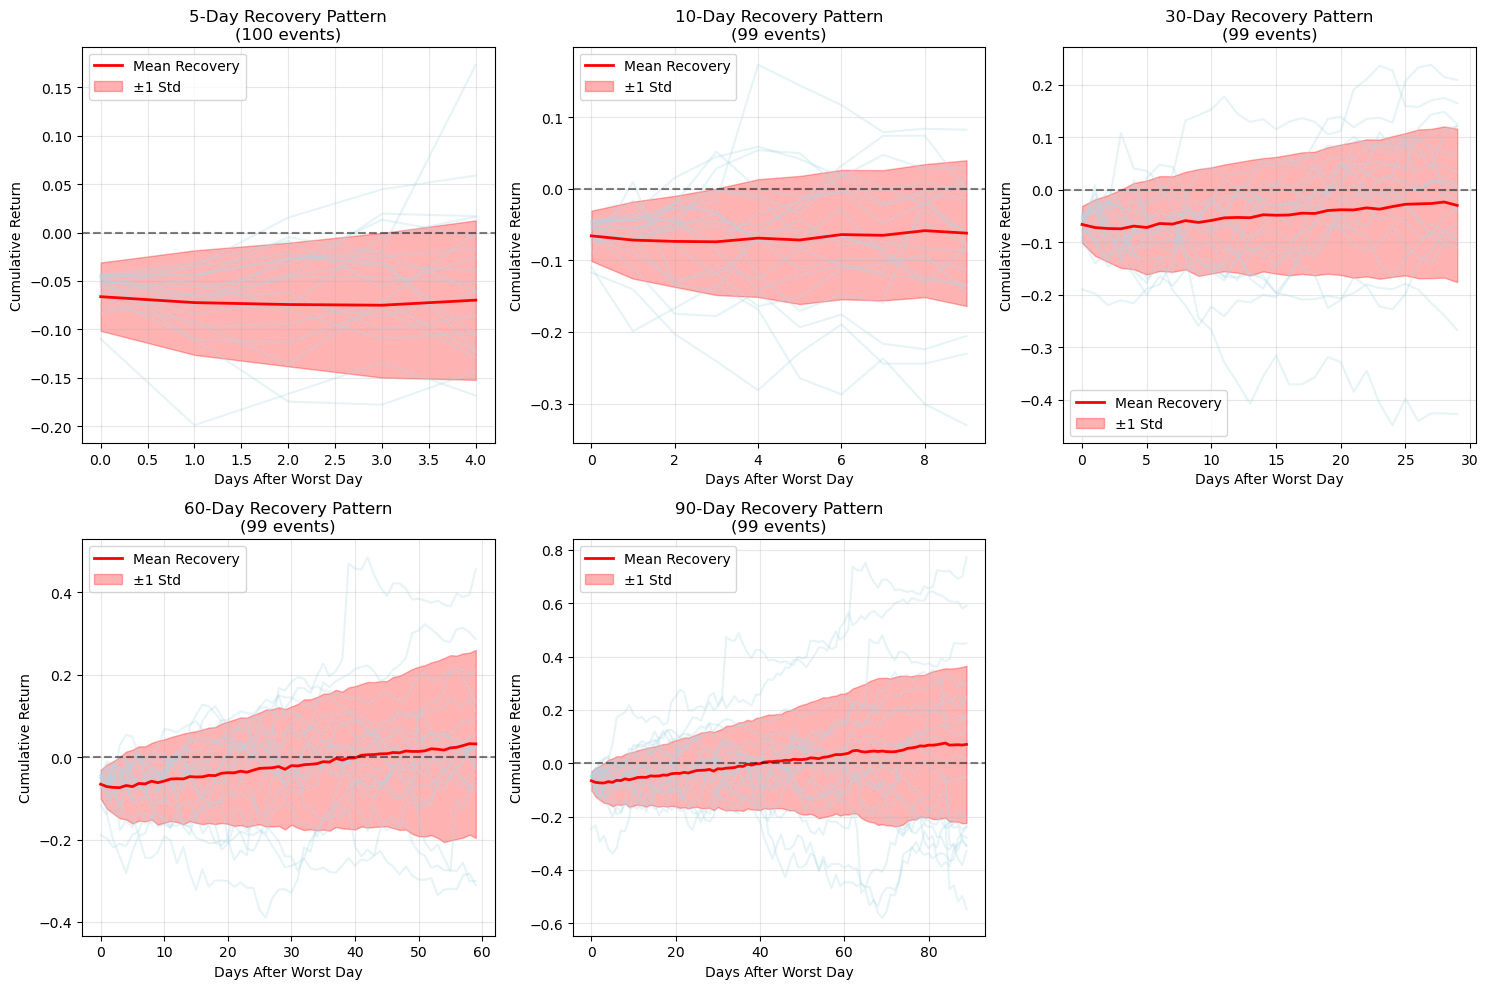


META RECOVERY ANALYSIS AFTER WORST DAYS

5-Day Recovery Window:
  • Average return: -6.98%
  • Probability of positive return: 13%
  • Success rate: 13/100 events
  • Median return: -5.60%
  • Best case: +17.32%
  • Worst case: -32.76%

10-Day Recovery Window:
  • Average return: -6.19%
  • Probability of positive return: 22%
  • Success rate: 22/99 events
  • Median return: -5.22%
  • Best case: +21.72%
  • Worst case: -35.32%

30-Day Recovery Window:
  • Average return: -2.95%
  • Probability of positive return: 42%
  • Success rate: 42/99 events
  • Median return: -2.66%
  • Best case: +34.51%
  • Worst case: -42.72%

60-Day Recovery Window:
  • Average return: +3.20%
  • Probability of positive return: 57%
  • Success rate: 56/99 events
  • Median return: +2.38%
  • Best case: +50.85%
  • Worst case: -57.28%

90-Day Recovery Window:
  • Average return: +7.06%
  • Probability of positive return: 66%
  • Success rate: 65/99 events
  • Median return: +13.27%
  • Best case: +77.20%
  

In [37]:
# CLEAN RECOVERY ANALYSIS - Final Version
def analyze_recovery_patterns_final():
    """Final clean recovery pattern analysis"""
    
    recovery_stats = {}
    
    for window in window_size:
        print(f"Processing {window}-day window...")
        
        all_recovery_paths = []
        valid_dates = []
        
        for day in worst_days.index:
            try:
                # Find the position of this worst day in our returns series
                day_idx = simple_returns.index.get_loc(day)
                
                # Check if we have enough data after this day
                if day_idx + window <= len(simple_returns):
                    # Get the recovery path (including the worst day itself)
                    recovery_path = simple_returns.iloc[day_idx:day_idx + window].cumsum()
                    all_recovery_paths.append(recovery_path.values)
                    valid_dates.append(day)
                    
            except (KeyError, IndexError):
                continue
        
        if all_recovery_paths:
            # Convert to DataFrame: rows = days, columns = recovery events
            recovery_df = pd.DataFrame(all_recovery_paths).T
            recovery_df.index = range(window)  # Days 0, 1, 2, ..., window-1
            
            # Calculate statistics
            mean_recovery = recovery_df.mean(axis=1)
            median_recovery = recovery_df.median(axis=1)
            std_recovery = recovery_df.std(axis=1)
            
            recovery_stats[window] = {
                'data': recovery_df,
                'mean': mean_recovery,
                'median': median_recovery,
                'std': std_recovery,
                'count': len(all_recovery_paths),
                'valid_dates': valid_dates
            }
            
            print(f"  Successfully processed {len(all_recovery_paths)} recovery events")
        else:
            print(f"  No valid recovery events found")
    
    return recovery_stats

# Run the analysis
print("Running final recovery analysis...")
recovery_analysis = analyze_recovery_patterns_final()

# Visualization
plt.figure(figsize=(15, 10))

for i, window in enumerate(window_size):
    if window in recovery_analysis:
        plt.subplot(2, 3, i+1)
        
        # Plot sample recovery paths
        data = recovery_analysis[window]['data']
        sample_data = data.sample(min(20, data.shape[1]), axis=1)
        plt.plot(sample_data, alpha=0.3, color='lightblue')
        
        # Plot mean and confidence bands
        mean_recovery = recovery_analysis[window]['mean']
        std_recovery = recovery_analysis[window]['std']
        
        days = range(len(mean_recovery))
        plt.plot(days, mean_recovery, 'r-', linewidth=2, label='Mean Recovery')
        plt.fill_between(days, 
                        mean_recovery - std_recovery, 
                        mean_recovery + std_recovery, 
                        alpha=0.3, color='red', label='±1 Std')
        
        plt.title(f'{window}-Day Recovery Pattern\n({recovery_analysis[window]["count"]} events)')
        plt.xlabel('Days After Worst Day')
        plt.ylabel('Cumulative Return')
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Final Statistics
print("\n" + "="*60)
print(f"{tickers[0]} RECOVERY ANALYSIS AFTER WORST DAYS")
print("="*60)

for window in window_size:
    if window in recovery_analysis:
        stats = recovery_analysis[window]
        
        # Get final day returns for all recovery events
        final_day_returns = stats['data'].iloc[-1]
        mean_return = stats['mean'].iloc[-1]
        
        # Calculate probability statistics
        positive_outcomes = (final_day_returns > 0).sum()
        total_outcomes = len(final_day_returns)
        prob_positive = positive_outcomes / total_outcomes
        
        print(f"\n{window}-Day Recovery Window:")
        print(f"  • Average return: {mean_return:+.2%}")
        print(f"  • Probability of positive return: {prob_positive:.0%}")
        print(f"  • Success rate: {positive_outcomes}/{total_outcomes} events")
        print(f"  • Median return: {final_day_returns.median():+.2%}")
        print(f"  • Best case: {final_day_returns.max():+.2%}")
        print(f"  • Worst case: {final_day_returns.min():+.2%}")

print("\n" + "="*60)
print("="*60)

Running analysis for patterns AFTER best days...
Processing 5-day window after best days...
  Successfully processed 100 periods after best days
Processing 10-day window after best days...
  Successfully processed 100 periods after best days
Processing 30-day window after best days...
  Successfully processed 100 periods after best days
Processing 60-day window after best days...
  Successfully processed 100 periods after best days
Processing 90-day window after best days...
  Successfully processed 99 periods after best days


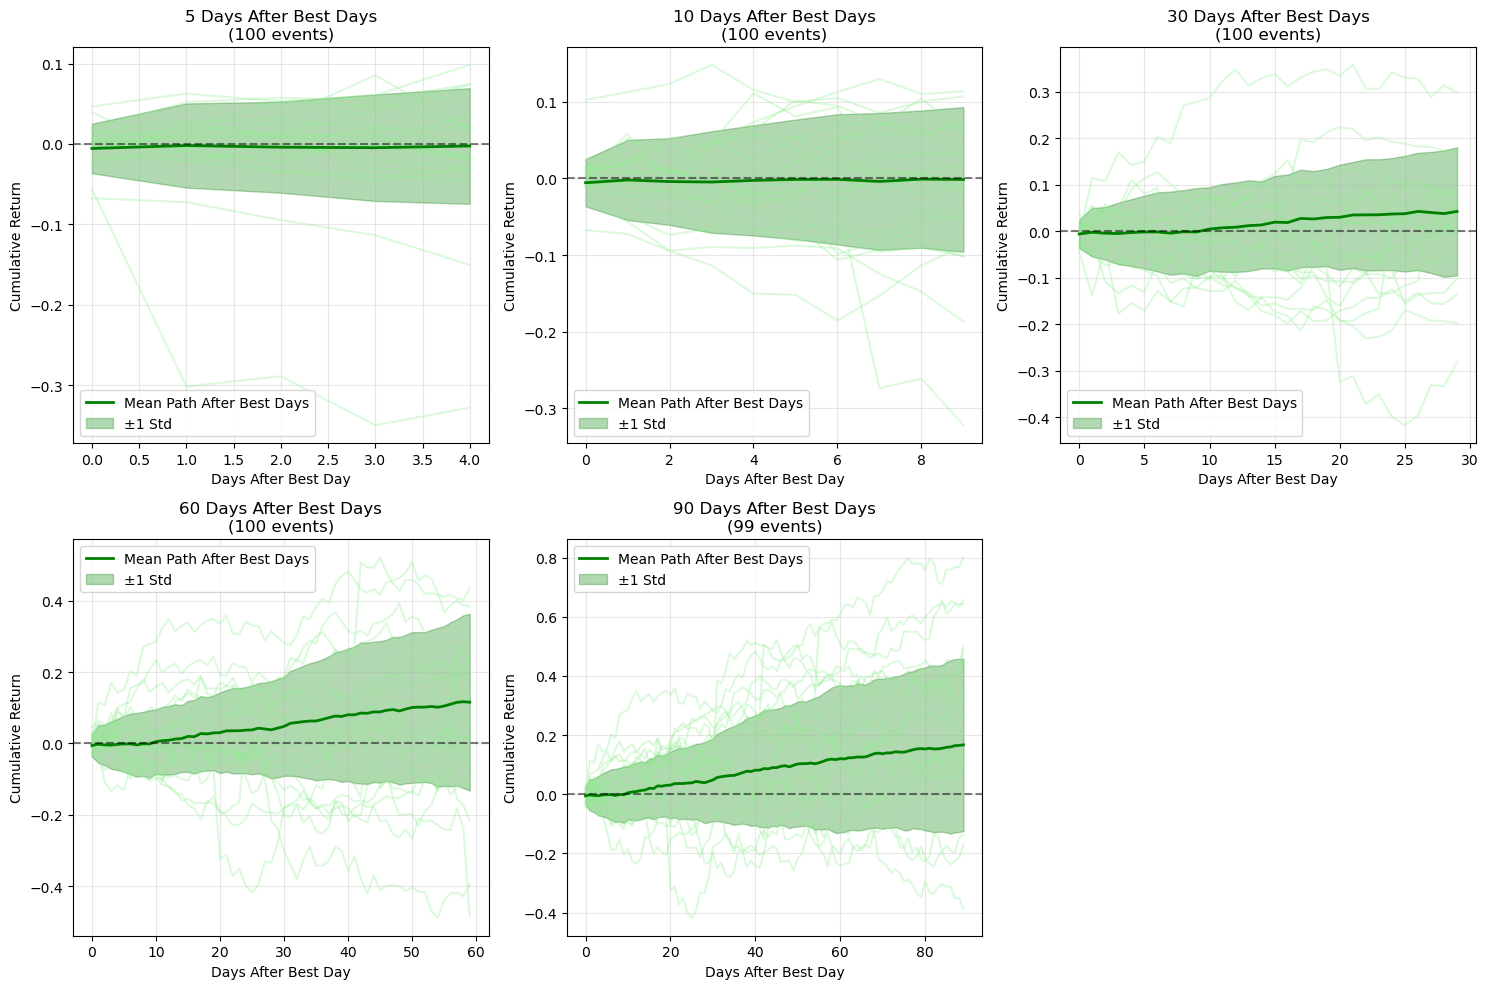


META PATTERNS AFTER THE TOP 100 BEST DAYS

5 Days After Big Rally:
  • Average return: -0.25%
  • Probability of continued gains: 44%
  • Probability of pullback: 56%
  • Continued gains: 44/100 events
  • Pullbacks: 56/100 events
  • Median return: -0.51%
  • Best case: +17.26%
  • Worst case: -32.76%

10 Days After Big Rally:
  • Average return: -0.13%
  • Probability of continued gains: 47%
  • Probability of pullback: 53%
  • Continued gains: 47/100 events
  • Pullbacks: 53/100 events
  • Median return: -0.40%
  • Best case: +27.89%
  • Worst case: -32.20%

30 Days After Big Rally:
  • Average return: +4.30%
  • Probability of continued gains: 66%
  • Probability of pullback: 34%
  • Continued gains: 66/100 events
  • Pullbacks: 34/100 events
  • Median return: +5.81%
  • Best case: +29.86%
  • Worst case: -34.78%

60 Days After Big Rally:
  • Average return: +11.57%
  • Probability of continued gains: 71%
  • Probability of pullback: 29%
  • Continued gains: 71/100 events
  • Pul

In [38]:
# ================================================================
# ANALYSIS OF PATTERNS AFTER THE TOP 100 BEST DAYS
# ================================================================

# CLEAN ANALYSIS FOR BEST DAYS - What happens after major rallies?
def analyze_patterns_after_best_days():
    """Analyze what happens after the top 100 best market days"""
    
    best_day_stats = {}
    
    for window in window_size:
        print(f"Processing {window}-day window after best days...")
        
        all_paths_after_best = []
        valid_dates = []
        
        for day in best_days.index:
            try:
                # Find the position of this best day in our returns series
                day_idx = simple_returns.index.get_loc(day)
                
                # Check if we have enough data after this day
                if day_idx + window <= len(simple_returns):
                    # Get the path AFTER the best day (starting from day+1, not including the best day itself)
                    path_after = simple_returns.iloc[day_idx + 1:day_idx + 1 + window].cumsum()
                    all_paths_after_best.append(path_after.values)
                    valid_dates.append(day)
                    
            except (KeyError, IndexError):
                continue
        
        if all_paths_after_best:
            # Convert to DataFrame: rows = days, columns = events after best days
            paths_df = pd.DataFrame(all_paths_after_best).T
            paths_df.index = range(window)  # Days 1, 2, 3, ..., window after best day
            
            # Calculate statistics
            mean_path = paths_df.mean(axis=1)
            median_path = paths_df.median(axis=1)
            std_path = paths_df.std(axis=1)
            
            best_day_stats[window] = {
                'data': paths_df,
                'mean': mean_path,
                'median': median_path,
                'std': std_path,
                'count': len(all_paths_after_best),
                'valid_dates': valid_dates
            }
            
            print(f"  Successfully processed {len(all_paths_after_best)} periods after best days")
        else:
            print(f"  No valid periods found")
    
    return best_day_stats

# Run the analysis for best days
print("Running analysis for patterns AFTER best days...")
best_day_analysis = analyze_patterns_after_best_days()

# Visualization - What happens AFTER best days
plt.figure(figsize=(15, 10))

for i, window in enumerate(window_size):
    if window in best_day_analysis:
        plt.subplot(2, 3, i+1)
        
        # Plot sample paths after best days
        data = best_day_analysis[window]['data']
        sample_data = data.sample(min(20, data.shape[1]), axis=1)
        plt.plot(sample_data, alpha=0.3, color='lightgreen')
        
        # Plot mean and confidence bands
        mean_path = best_day_analysis[window]['mean']
        std_path = best_day_analysis[window]['std']
        
        days = range(len(mean_path))
        plt.plot(days, mean_path, 'g-', linewidth=2, label='Mean Path After Best Days')
        plt.fill_between(days, 
                        mean_path - std_path, 
                        mean_path + std_path, 
                        alpha=0.3, color='green', label='±1 Std')
        
        plt.title(f'{window} Days After Best Days\n({best_day_analysis[window]["count"]} events)')
        plt.xlabel('Days After Best Day')
        plt.ylabel('Cumulative Return')
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Statistics for what happens AFTER best days
print("\n" + "="*60)
print(f"{tickers[0]} PATTERNS AFTER THE TOP 100 BEST DAYS")
print("="*60)

for window in window_size:
    if window in best_day_analysis:
        stats = best_day_analysis[window]
        
        # Get final day returns for all periods after best days
        final_day_returns = stats['data'].iloc[-1]
        mean_return = stats['mean'].iloc[-1]
        
        # Calculate probability statistics
        positive_outcomes = (final_day_returns > 0).sum()
        total_outcomes = len(final_day_returns)
        prob_positive = positive_outcomes / total_outcomes
        
        # Calculate negative outcomes (pullbacks after rallies)
        negative_outcomes = (final_day_returns < 0).sum()
        prob_negative = negative_outcomes / total_outcomes
        
        print(f"\n{window} Days After Big Rally:")
        print(f"  • Average return: {mean_return:+.2%}")
        print(f"  • Probability of continued gains: {prob_positive:.0%}")
        print(f"  • Probability of pullback: {prob_negative:.0%}")
        print(f"  • Continued gains: {positive_outcomes}/{total_outcomes} events")
        print(f"  • Pullbacks: {negative_outcomes}/{total_outcomes} events")
        print(f"  • Median return: {final_day_returns.median():+.2%}")
        print(f"  • Best case: {final_day_returns.max():+.2%}")
        print(f"  • Worst case: {final_day_returns.min():+.2%}")

print("\n" + "="*60)
print("="*60)

# COMPARATIVE ANALYSIS: Best Days vs Worst Days
print("\n" + "="*80)
print("COMPARATIVE ANALYSIS: AFTER BEST DAYS vs AFTER WORST DAYS")
print("="*80)

# Create comparison table
comparison_data = []
for window in window_size:
    if window in recovery_analysis and window in best_day_analysis:
        # After worst days (recovery analysis)
        worst_mean = recovery_analysis[window]['mean'].iloc[-1]
        worst_prob_positive = (recovery_analysis[window]['data'].iloc[-1] > 0).mean()
        
        # After best days
        best_mean = best_day_analysis[window]['mean'].iloc[-1]
        best_prob_positive = (best_day_analysis[window]['data'].iloc[-1] > 0).mean()
        
        comparison_data.append({
            'Window': f'{window} days',
            'After_Worst_Mean': f'{worst_mean:+.2%}',
            'After_Worst_Success': f'{worst_prob_positive:.0%}',
            'After_Best_Mean': f'{best_mean:+.2%}',
            'After_Best_Success': f'{best_prob_positive:.0%}',
            'Difference': f'{best_mean - worst_mean:+.2%}'
        })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

print("\n" + "="*80)
print("STRATEGIC IMPLICATIONS:")
print("• Market timing: Compare recovery odds vs post-rally risks")
print("• Contrarian vs momentum: Which approach works better at different horizons?")
print("• Portfolio rebalancing: When to buy dips vs take profits")
print("="*80)

In [39]:
# FIXED VERSION - Create DataFrame with proper structure
# Create DataFrames instead of adding columns to Series
worst_days_df = pd.DataFrame({
    'return': worst_days.values,
    'day_type': 'worst'
}, index=worst_days.index)

best_days_df = pd.DataFrame({
    'return': best_days.values,
    'day_type': 'best'
}, index=best_days.index)

# concatenate the two dataframes
worst_and_best = pd.concat([worst_days_df, best_days_df])

# sort by index (date)
worst_and_best = worst_and_best.sort_index()

# print shape and head
print("Combined DataFrame shape:", worst_and_best.shape)
print("\nFirst few rows:")
print(worst_and_best.head())

print("\nLast few rows:")
print(worst_and_best.tail())

print("\nValue counts by day type:")
print(worst_and_best['day_type'].value_counts())

print("\nSample of worst days:")
print(worst_and_best[worst_and_best['day_type'] == 'worst'].head())

print("\nSample of best days:")
print(worst_and_best[worst_and_best['day_type'] == 'best'].head())

Combined DataFrame shape: (200, 2)

First few rows:
              return day_type
Date                         
2012-05-21 -0.109861    worst
2012-05-22 -0.089039    worst
2012-05-29 -0.096208    worst
2012-05-31  0.050018     best
2012-06-01 -0.063514    worst

Last few rows:
              return day_type
Date                         
2025-04-09  0.147556     best
2025-04-10 -0.067398    worst
2025-05-12  0.079225     best
2025-07-31  0.112527     best
2025-10-30 -0.113348    worst

Value counts by day type:
day_type
worst    100
best     100
Name: count, dtype: int64

Sample of worst days:
              return day_type
Date                         
2012-05-21 -0.109861    worst
2012-05-22 -0.089039    worst
2012-05-29 -0.096208    worst
2012-06-01 -0.063514    worst
2012-07-16 -0.080404    worst

Sample of best days:
              return day_type
Date                         
2012-05-31  0.050018     best
2012-06-15  0.060799     best
2012-06-18  0.046651     best
2012-08-03  0.05239

In [40]:
# lambda function to calculate the difference in days between two consecutive dates
worst_and_best['days_since_last'] = worst_and_best.index.to_series().diff().dt.days.fillna(0).astype(int)

# print the first few rows to verify
print("\nFirst few rows with days_since_last:")
print(worst_and_best.head())


First few rows with days_since_last:
              return day_type  days_since_last
Date                                          
2012-05-21 -0.109861    worst                0
2012-05-22 -0.089039    worst                1
2012-05-29 -0.096208    worst                7
2012-05-31  0.050018     best                2
2012-06-01 -0.063514    worst                1


In [41]:
worst_and_best.head(10)

,return,day_type,days_since_last
Date,,,
2012-05-21,-0.109861,worst,0
2012-05-22,-0.089039,worst,1
2012-05-29,-0.096208,worst,7
2012-05-31,0.050018,best,2
2012-06-01,-0.063514,worst,1
2012-06-15,0.060799,best,14
2012-06-18,0.046651,best,3
2012-07-16,-0.080404,worst,28
2012-07-26,-0.084867,worst,10


PROBABILITY ANALYSIS: WORST DAYS FOLLOWED BY BEST DAYS

Analyzing 5-day window...
  • Probability: 23.0%
  • Success cases: 23/100
  • Average days to recovery: 3.3

Analyzing 10-day window...
  • Probability: 49.0%
  • Success cases: 49/100
  • Average days to recovery: 5.5

Analyzing 30-day window...
  • Probability: 75.0%
  • Success cases: 75/100
  • Average days to recovery: 9.6

Analyzing 60-day window...
  • Probability: 84.0%
  • Success cases: 84/100
  • Average days to recovery: 12.9

Analyzing 90-day window...
  • Probability: 89.0%
  • Success cases: 89/100
  • Average days to recovery: 16.4

SUMMARY: PROBABILITY OF BEST DAY AFTER WORST DAY
 Window (Days) Probability Success Rate Avg Days to Recovery Median Days Range
             5       23.0%       23/100                  3.3         4.0   1-5
            10       49.0%       49/100                  5.5         6.0  1-10
            30       75.0%       75/100                  9.6         7.0  1-30
            60       84

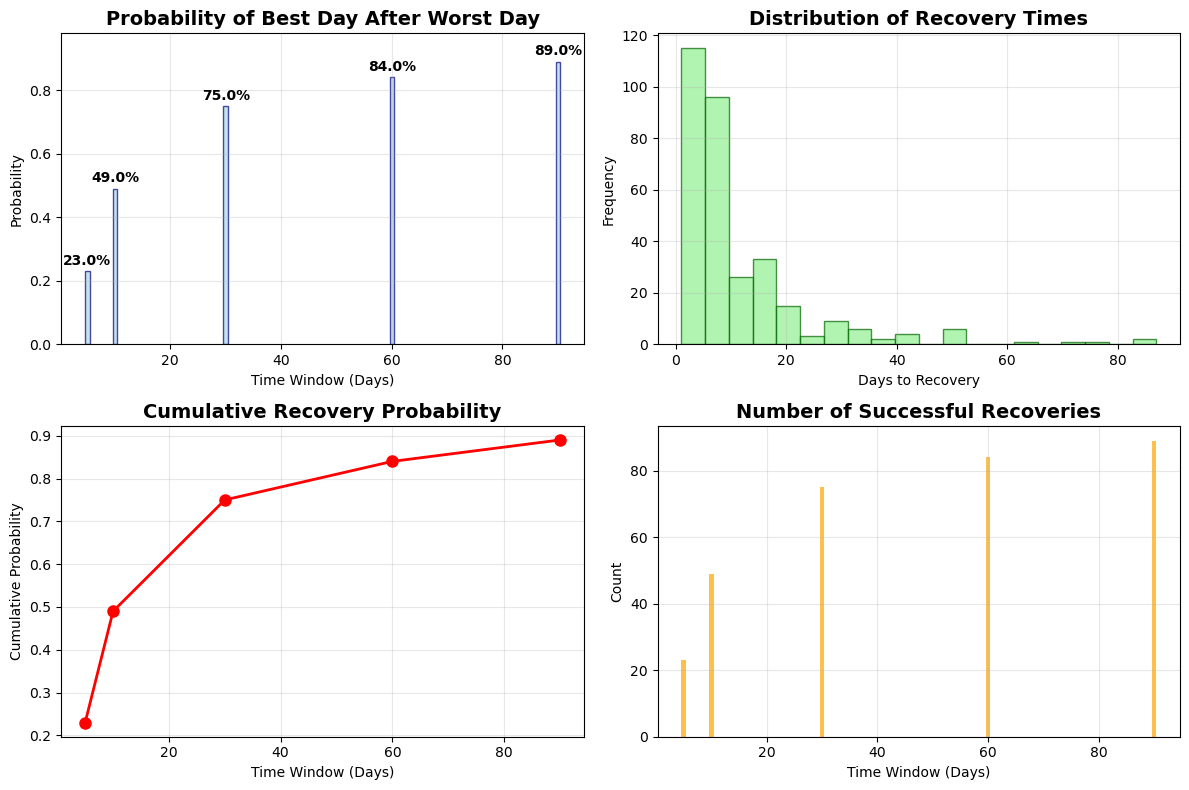


SAMPLE SUCCESSFUL RECOVERY CASES (30-day window)
 1. Worst day: 2012-05-21 (-10.99%)
    Best day:  2012-05-31 (+5.00%)
    Recovery:  10 days

 2. Worst day: 2012-05-22 (-8.90%)
    Best day:  2012-05-31 (+5.00%)
    Recovery:  9 days

 3. Worst day: 2012-05-29 (-9.62%)
    Best day:  2012-05-31 (+5.00%)
    Recovery:  2 days

 4. Worst day: 2012-06-01 (-6.35%)
    Best day:  2012-06-15 (+6.08%)
    Recovery:  14 days

 5. Worst day: 2012-07-16 (-8.04%)
    Best day:  2012-08-03 (+5.24%)
    Recovery:  18 days

 6. Worst day: 2012-07-26 (-8.49%)
    Best day:  2012-08-03 (+5.24%)
    Recovery:  8 days

 7. Worst day: 2012-07-27 (-11.69%)
    Best day:  2012-08-03 (+5.24%)
    Recovery:  7 days

 8. Worst day: 2012-07-31 (-6.22%)
    Best day:  2012-08-03 (+5.24%)
    Recovery:  3 days

 9. Worst day: 2012-08-07 (-5.47%)
    Best day:  2012-08-20 (+5.04%)
    Recovery:  13 days

10. Worst day: 2012-08-14 (-5.65%)
    Best day:  2012-08-20 (+5.04%)
    Recovery:  6 days



In [42]:
# ================================================================
# PROBABILITY ANALYSIS: WORST DAYS FOLLOWED BY BEST DAYS
# ================================================================

def analyze_worst_to_best_probability(worst_and_best_df, window_sizes):
    """
    Calculate the probability that after a worst day, we get a best day within different time windows
    """
    
    results = {}
    
    # Get only worst days
    worst_days_only = worst_and_best_df[worst_and_best_df['day_type'] == 'worst'].copy()
    
    print("="*70)
    print("PROBABILITY ANALYSIS: WORST DAYS FOLLOWED BY BEST DAYS")
    print("="*70)
    
    for window in window_sizes:
        print(f"\nAnalyzing {window}-day window...")
        
        success_count = 0
        total_worst_days = 0
        successful_dates = []
        
        for worst_date in worst_days_only.index:
            total_worst_days += 1
            
            # Define the window after this worst day
            window_start = worst_date + pd.Timedelta(days=1)  # Start from next day
            window_end = worst_date + pd.Timedelta(days=window)
            
            # Check if there's a best day within this window
            best_days_in_window = worst_and_best_df[
                (worst_and_best_df.index > worst_date) & 
                (worst_and_best_df.index <= window_end) & 
                (worst_and_best_df['day_type'] == 'best')
            ]
            
            if len(best_days_in_window) > 0:
                success_count += 1
                # Get the first best day in the window
                first_best_day = best_days_in_window.index[0]
                days_to_recovery = (first_best_day - worst_date).days
                successful_dates.append({
                    'worst_date': worst_date,
                    'best_date': first_best_day,
                    'days_to_recovery': days_to_recovery,
                    'worst_return': worst_and_best_df.loc[worst_date, 'return'],
                    'best_return': worst_and_best_df.loc[first_best_day, 'return']
                })
        
        # Calculate probability
        probability = success_count / total_worst_days if total_worst_days > 0 else 0
        
        results[window] = {
            'probability': probability,
            'success_count': success_count,
            'total_worst_days': total_worst_days,
            'successful_cases': successful_dates
        }
        
        print(f"  • Probability: {probability:.1%}")
        print(f"  • Success cases: {success_count}/{total_worst_days}")
        
        # Show average days to recovery
        if successful_dates:
            avg_days = np.mean([case['days_to_recovery'] for case in successful_dates])
            print(f"  • Average days to recovery: {avg_days:.1f}")
    
    return results

# Run the analysis
window_sizes = [5, 10, 30, 60, 90]
recovery_probabilities = analyze_worst_to_best_probability(worst_and_best, window_sizes)

# ================================================================
# DETAILED RESULTS AND VISUALIZATION
# ================================================================

# Create summary table
summary_data = []
for window in window_sizes:
    stats = recovery_probabilities[window]
    
    # Calculate additional statistics
    if stats['successful_cases']:
        avg_days = np.mean([case['days_to_recovery'] for case in stats['successful_cases']])
        median_days = np.median([case['days_to_recovery'] for case in stats['successful_cases']])
        min_days = min([case['days_to_recovery'] for case in stats['successful_cases']])
        max_days = max([case['days_to_recovery'] for case in stats['successful_cases']])
    else:
        avg_days = median_days = min_days = max_days = np.nan
    
    summary_data.append({
        'Window (Days)': window,
        'Probability': f"{stats['probability']:.1%}",
        'Success Rate': f"{stats['success_count']}/{stats['total_worst_days']}",
        'Avg Days to Recovery': f"{avg_days:.1f}" if not np.isnan(avg_days) else "N/A",
        'Median Days': f"{median_days:.1f}" if not np.isnan(median_days) else "N/A",
        'Range': f"{min_days}-{max_days}" if not np.isnan(min_days) else "N/A"
    })

summary_df = pd.DataFrame(summary_data)
print("\n" + "="*80)
print("SUMMARY: PROBABILITY OF BEST DAY AFTER WORST DAY")
print("="*80)
print(summary_df.to_string(index=False))

# ================================================================
# VISUALIZATION: PROBABILITY BY WINDOW SIZE
# ================================================================

plt.figure(figsize=(12, 8))

# Extract probabilities for plotting
windows = list(recovery_probabilities.keys())
probabilities = [recovery_probabilities[w]['probability'] for w in windows]

# Create bar plot
plt.subplot(2, 2, 1)
bars = plt.bar(windows, probabilities, color='lightblue', edgecolor='navy', alpha=0.7)
plt.title('Probability of Best Day After Worst Day', fontsize=14, fontweight='bold')
plt.xlabel('Time Window (Days)')
plt.ylabel('Probability')
plt.ylim(0, max(probabilities) * 1.1)

# Add percentage labels on bars
for bar, prob in zip(bars, probabilities):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{prob:.1%}', ha='center', va='bottom', fontweight='bold')

plt.grid(True, alpha=0.3)

# Recovery time distribution
plt.subplot(2, 2, 2)
all_recovery_times = []
for window in windows:
    if recovery_probabilities[window]['successful_cases']:
        recovery_times = [case['days_to_recovery'] for case in recovery_probabilities[window]['successful_cases']]
        all_recovery_times.extend(recovery_times)

if all_recovery_times:
    plt.hist(all_recovery_times, bins=20, color='lightgreen', alpha=0.7, edgecolor='darkgreen')
    plt.title('Distribution of Recovery Times', fontsize=14, fontweight='bold')
    plt.xlabel('Days to Recovery')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)

# Cumulative probability
plt.subplot(2, 2, 3)
plt.plot(windows, probabilities, marker='o', linewidth=2, markersize=8, color='red')
plt.title('Cumulative Recovery Probability', fontsize=14, fontweight='bold')
plt.xlabel('Time Window (Days)')
plt.ylabel('Cumulative Probability')
plt.grid(True, alpha=0.3)

# Success count comparison
plt.subplot(2, 2, 4)
success_counts = [recovery_probabilities[w]['success_count'] for w in windows]
plt.bar(windows, success_counts, color='orange', alpha=0.7)
plt.title('Number of Successful Recoveries', fontsize=14, fontweight='bold')
plt.xlabel('Time Window (Days)')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ================================================================
# SAMPLE SUCCESSFUL CASES
# ================================================================

print("\n" + "="*80)
print("SAMPLE SUCCESSFUL RECOVERY CASES (30-day window)")
print("="*80)

if recovery_probabilities[30]['successful_cases']:
    sample_cases = recovery_probabilities[30]['successful_cases'][:10]  # First 10 cases
    
    for i, case in enumerate(sample_cases, 1):
        print(f"{i:2d}. Worst day: {case['worst_date'].strftime('%Y-%m-%d')} ({case['worst_return']:+.2%})")
        print(f"    Best day:  {case['best_date'].strftime('%Y-%m-%d')} ({case['best_return']:+.2%})")
        print(f"    Recovery:  {case['days_to_recovery']} days")
        print()

print("="*80)
print("="*80)